In [1]:
!wget -q https://www.dropbox.com/s/ugajb9vwqqjpmo4/MT_RCAN.zip
!unzip -q MT_RCAN.zip
!rm MT_RCAN.zip

!wget -q https://www.dropbox.com/s/4xhnxri2rd25lc6/MT_WGAN.zip
!unzip -q MT_WGAN.zip
!rm MT_WGAN.zip

!wget -q https://www.dropbox.com/s/moeooo0lgnogcyv/MT.zip
!unzip -q MT.zip
!rm MT.zip

/bin/bash: /home/ihidalgo/miniconda3/envs/microscopy/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ihidalgo/miniconda3/envs/microscopy/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ihidalgo/miniconda3/envs/microscopy/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ihidalgo/miniconda3/envs/microscopy/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ihidalgo/miniconda3/envs/microscopy/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ihidalgo/miniconda3/envs/microscopy/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ihidalgo/miniconda3/envs/microscopy/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/ihidalgo/miniconda3/envs/microscopy/lib/libtinfo.so.6: no version information av

In [2]:
from skimage import io
from skimage import filters
from skimage import metrics
from skimage import img_as_float32, img_as_float64
import numpy as np

def normalize(img):
  return (img - img.min()) / (img.max() - img.min() + 1e-10)

In [ ]:
rcan_path = '/content/MT_RCAN/001.tif'
wgan_path = '/content/MT_WGAN/001.tif'
gt_img_path = '/content/MT/test/test_gt/001.tif'
wf_img_path = '/content/MT/test/test_wf/level_01/001.tif'

predicted_path = rcan_path
real_path = gt_img_path
widefield_path = wf_img_path

predicted_image = io.imread(predicted_path)
print('predicted_image - Min: {} Max: {} Mean: {}'.format(np.min(predicted_image), np.max(predicted_image), np.mean(predicted_image)))
real_image = io.imread(real_path)
print('real_image - Min: {} Max: {} Mean: {}'.format(np.min(real_image), np.max(real_image), np.mean(real_image)))
real_image = io.imread(real_path)
print('real_image - Min: {} Max: {} Mean: {}'.format(np.min(real_image), np.max(real_image), np.mean(real_image)))


predicted_image_float32 = img_as_float32(predicted_image)
print('predicted_image_float32 - Min: {} Max: {} Mean: {}'.format(np.min(predicted_image_float32), np.max(predicted_image_float32), np.mean(predicted_image_float32)))
real_image_float32 = img_as_float32(real_image)
print('real_image_float32 - Min: {} Max: {} Mean: {}'.format(np.min(real_image_float32), np.max(real_image_float32), np.mean(real_image_float32)))

predicted_image_float64 = img_as_float64(predicted_image)
print('predicted_image_float64 - Min: {} Max: {} Mean: {}'.format(np.min(predicted_image_float64), np.max(predicted_image_float64), np.mean(predicted_image_float64)))
real_image_float64 = img_as_float64(real_image)
print('real_image_float64 - Min: {} Max: {} Mean: {}'.format(np.min(real_image_float64), np.max(real_image_float64), np.mean(real_image_float64)))

predicted_image - Min: 0 Max: 255 Mean: 152.28393173217773
real_image - Min: 0 Max: 227 Mean: 132.74459838867188
predicted_image_float32 - Min: 0.0 Max: 1.0 Mean: 0.5971922278404236
real_image_float32 - Min: 0.0 Max: 0.8901961445808411 Mean: 0.5205669403076172
predicted_image_float64 - Min: 0.0 Max: 1.0 Mean: 0.5971918891457954
real_image_float64 - Min: 0.0 Max: 0.8901960784313725 Mean: 0.5205670525045956


Text(0.5, 1.0, 'Real image (250x250 patch)')

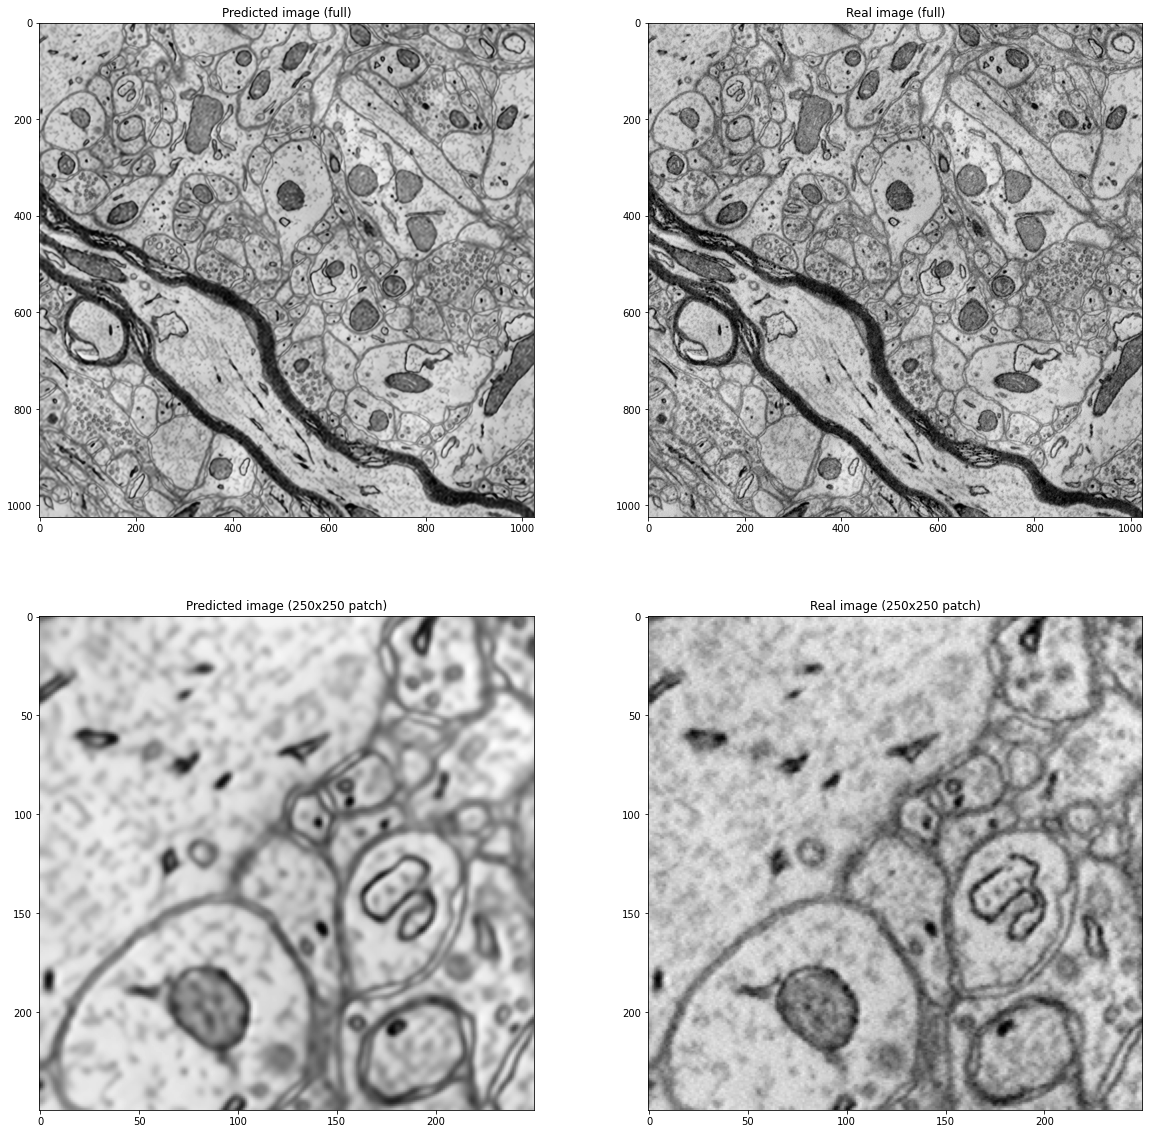

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(predicted_image, 'gray')
plt.title('Predicted image (full)')
plt.subplot(2,2,2)
plt.imshow(real_image, 'gray')
plt.title('Real image (full)')
plt.subplot(2,2,3)
plt.imshow(predicted_image[:250,:250], 'gray')
plt.title('Predicted image (250x250 patch)')
plt.subplot(2,2,4)
plt.imshow(real_image[:250,:250], 'gray')
plt.title('Real image (250x250 patch)')

In [ ]:
import torch

real_image_piq = real_image/255
real_image_piq = np.expand_dims(real_image_piq, axis=0)
real_image_piq = np.expand_dims(real_image_piq, axis=0)
real_image_piq = torch.from_numpy(real_image_piq)

predicted_image_piq = predicted_image/255
predicted_image_piq = np.expand_dims(predicted_image_piq, axis=0)
predicted_image_piq = np.expand_dims(predicted_image_piq, axis=0)
predicted_image_piq = torch.from_numpy(predicted_image_piq)

real_image_piq_float32 = real_image_float32
real_image_piq_float32 = np.expand_dims(real_image_piq_float32, axis=0)
real_image_piq_float32 = np.expand_dims(real_image_piq_float32, axis=0)
real_image_piq_float32 = torch.from_numpy(real_image_piq_float32)

predicted_image_piq_float32 = predicted_image_float32
predicted_image_piq_float32 = np.expand_dims(predicted_image_piq_float32, axis=0)
predicted_image_piq_float32 = np.expand_dims(predicted_image_piq_float32, axis=0)
predicted_image_piq_float32 = torch.from_numpy(predicted_image_piq_float32)

real_image_piq_float64 = real_image_float64
real_image_piq_float64 = np.expand_dims(real_image_piq_float64, axis=0)
real_image_piq_float64 = np.expand_dims(real_image_piq_float64, axis=0)
real_image_piq_float64 = torch.from_numpy(real_image_piq_float64)

predicted_image_piq_float64 = predicted_image_float64
predicted_image_piq_float64 = np.expand_dims(predicted_image_piq_float64, axis=0)
predicted_image_piq_float64 = np.expand_dims(predicted_image_piq_float64, axis=0)
predicted_image_piq_float64 = torch.from_numpy(predicted_image_piq_float64)

# Structural Similarity (SSIM)

In [ ]:
print('SSIM: {}'.format(metrics.structural_similarity(predicted_image, real_image)))
print('SSIM: {}'.format(metrics.structural_similarity(real_image, predicted_image)))
print('SSIM float32: {}'.format(metrics.structural_similarity(predicted_image_float32, real_image_float32)))
print('SSIM float32: {}'.format(metrics.structural_similarity(real_image_float32, predicted_image_float32)))
print('SSIM float64: {}'.format(metrics.structural_similarity(predicted_image_float64, real_image_float64)))
print('SSIM float64: {}'.format(metrics.structural_similarity(real_image_float64, predicted_image_float64)))

SSIM: 0.8140946920838752
SSIM: 0.8140946920838752
SSIM float32: 0.86561565516567
SSIM float32: 0.86561565516567
SSIM float64: 0.8656156630198842
SSIM float64: 0.8656156630198842


# Peak Signal Noise Ratio (PSNR)

In [ ]:
print('PSNR: {}'.format(metrics.peak_signal_noise_ratio(predicted_image, real_image)))
print('PSNR: {}'.format(metrics.peak_signal_noise_ratio(real_image, predicted_image)))
print('PSNR float32: {}'.format(metrics.peak_signal_noise_ratio(predicted_image_float32, real_image_float32)))
print('PSNR float32: {}'.format(metrics.peak_signal_noise_ratio(real_image_float32, predicted_image_float32)))
print('PSNR float64: {}'.format(metrics.peak_signal_noise_ratio(predicted_image_float64, real_image_float64)))
print('PSNR float64: {}'.format(metrics.peak_signal_noise_ratio(real_image_float64, predicted_image_float64)))

PSNR: 20.862086993332593
PSNR: 20.862086993332593
PSNR float32: 20.862085769429243
PSNR float32: 20.862085769429243
PSNR float64: 20.862086993332593
PSNR float64: 20.862086993332593


# Mean Squared Error

In [ ]:
print('MSE: {}'.format(metrics.mean_squared_error(predicted_image, real_image)))
print('MSE: {}'.format(metrics.mean_squared_error(real_image, predicted_image)))
print('MSE float32: {}'.format(metrics.mean_squared_error(predicted_image_float32, real_image_float32)))
print('MSE float32: {}'.format(metrics.mean_squared_error(real_image_float32, predicted_image_float32)))
print('MSE float64: {}'.format(metrics.mean_squared_error(predicted_image_float64, real_image_float64)))
print('MSE float64: {}'.format(metrics.mean_squared_error(real_image_float64, predicted_image_float64)))

MSE: 533.1773128509521
MSE: 533.1773128509521
MSE float32: 0.008199576518383557
MSE float32: 0.008199576518383557
MSE float64: 0.0081995742076271
MSE float64: 0.0081995742076271


# Learned Perceptual Image Patch Similarity (LIPS)

##Imports:

In [ ]:
!pip install lpips
import lpips

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 KB 2.8 MB/s eta 0:00:00


## Execution

In [ ]:
loss_fn_alex = lpips.LPIPS(net='alex',version='0.1')
loss_fn_vgg = lpips.LPIPS(net='vgg',version='0.1')

# Load images
#img0 = predicted_image_piq # RGB image from [-1,1]
#img1 = real_image_piq
image_format = ['uint', 'float32', 'float64']
cont = 0
for img0, img1 in zip([predicted_image_piq, predicted_image_piq_float32, predicted_image_piq_float64],[real_image_piq, real_image_piq_float32, real_image_piq_float64]):
  print(image_format[cont])
  # Compute distance
  print('Distance Alex: {}'.format(loss_fn_alex(img0.float(), img1.float()).item()))
  print('Distance Alex: {}'.format(loss_fn_alex(img1.float(), img0.float()).item()))

  print('Distance VGG: {}'.format(loss_fn_vgg(img0.float(), img1.float()).item()))
  print('Distance VGG: {}'.format(loss_fn_vgg(img1.float(), img0.float()).item()))
  cont += 1

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

Loading model from: /usr/local/lib/python3.8/dist-packages/lpips/weights/v0.1/vgg.pth
uint
Distance Alex: 0.26809751987457275
Distance Alex: 0.26809751987457275
Distance VGG: 0.2945419251918793
Distance VGG: 0.2945419251918793
float32
Distance Alex: 0.26809754967689514
Distance Alex: 0.26809754967689514
Distance VGG: 0.29454195499420166
Distance VGG: 0.29454195499420166
float64
Distance Alex: 0.26809751987457275
Distance Alex: 0.26809751987457275
Distance VGG: 0.2945419251918793
Distance VGG: 0.2945419251918793


# Perceptual Index (IL-NIQE)

## Imports

In [ ]:
! git clone https://github.com/IceClear/IL-NIQE

Cloning into 'IL-NIQE'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 93 (delta 43), reused 39 (delta 15), pack-reused 12
Unpacking objects: 100% (93/93), 10.16 MiB | 9.56 MiB/s, done.


In [ ]:
import cv2
import math
import numpy as np
import os
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy.special import gamma
from scipy.ndimage import correlate
import scipy.io
from scipy.stats import exponweib
from scipy.optimize import fmin

import time
# import ray

def get_size_from_scale(input_size, scale_factor):
    """Get the output size given input size and scale factor.
    Args:
        input_size (tuple): The size of the input image.
        scale_factor (float): The resize factor.
    Returns:
        list[int]: The size of the output image.
    """

    output_shape = [
        int(np.ceil(scale * shape))
        for (scale, shape) in zip(scale_factor, input_size)
    ]

    return output_shape


def get_scale_from_size(input_size, output_size):
    """Get the scale factor given input size and output size.
    Args:
        input_size (tuple(int)): The size of the input image.
        output_size (tuple(int)): The size of the output image.
    Returns:
        list[float]: The scale factor of each dimension.
    """

    scale = [
        1.0 * output_shape / input_shape
        for (input_shape, output_shape) in zip(input_size, output_size)
    ]

    return scale


def _cubic(x):
    """ Cubic function.
    Args:
        x (ndarray): The distance from the center position.
    Returns:
        ndarray: The weight corresponding to a particular distance.
    """

    x = np.array(x, dtype=np.float32)
    x_abs = np.abs(x)
    x_abs_sq = x_abs**2
    x_abs_cu = x_abs_sq * x_abs

    # if |x| <= 1: y = 1.5|x|^3 - 2.5|x|^2 + 1
    # if 1 < |x| <= 2: -0.5|x|^3 + 2.5|x|^2 - 4|x| + 2
    f = (1.5 * x_abs_cu - 2.5 * x_abs_sq + 1) * (x_abs <= 1) + (
        -0.5 * x_abs_cu + 2.5 * x_abs_sq - 4 * x_abs + 2) * ((1 < x_abs) &
                                                             (x_abs <= 2))

    return f


def get_weights_indices(input_length, output_length, scale, kernel,
                        kernel_width):
    """Get weights and indices for interpolation.
    Args:
        input_length (int): Length of the input sequence.
        output_length (int): Length of the output sequence.
        scale (float): Scale factor.
        kernel (func): The kernel used for resizing.
        kernel_width (int): The width of the kernel.
    Returns:
        list[ndarray]: The weights and the indices for interpolation.
    """
    if scale < 1:  # modified kernel for antialiasing

        def h(x):
            return scale * kernel(scale * x)

        kernel_width = 1.0 * kernel_width / scale
    else:
        h = kernel
        kernel_width = kernel_width

    # coordinates of output
    x = np.arange(1, output_length + 1).astype(np.float32)

    # coordinates of input
    u = x / scale + 0.5 * (1 - 1 / scale)
    left = np.floor(u - kernel_width / 2)  # leftmost pixel
    p = int(np.ceil(kernel_width)) + 2  # maximum number of pixels

    # indices of input pixels
    ind = left[:, np.newaxis, ...] + np.arange(p)
    indices = ind.astype(np.int32)

    # weights of input pixels
    weights = h(u[:, np.newaxis, ...] - indices - 1)

    weights = weights / np.sum(weights, axis=1)[:, np.newaxis, ...]

    # remove all-zero columns
    aux = np.concatenate(
        (np.arange(input_length), np.arange(input_length - 1, -1,
                                            step=-1))).astype(np.int32)
    indices = aux[np.mod(indices, aux.size)]
    ind2store = np.nonzero(np.any(weights, axis=0))
    weights = weights[:, ind2store]
    indices = indices[:, ind2store]

    return weights, indices


def resize_along_dim(img_in, weights, indices, dim):
    """Resize along a specific dimension.
    Args:
        img_in (ndarray): The input image.
        weights (ndarray): The weights used for interpolation, computed from
            [get_weights_indices].
        indices (ndarray): The indices used for interpolation, computed from
            [get_weights_indices].
        dim (int): Which dimension to undergo interpolation.
    Returns:
        ndarray: Interpolated (along one dimension) image.
    """

    img_in = img_in.astype(np.float32)
    w_shape = weights.shape
    output_shape = list(img_in.shape)
    output_shape[dim] = w_shape[0]
    img_out = np.zeros(output_shape)

    if dim == 0:
        for i in range(w_shape[0]):
            w = weights[i, :][np.newaxis, ...]
            ind = indices[i, :]
            img_slice = img_in[ind, :]
            img_out[i] = np.sum(np.squeeze(img_slice, axis=0) * w.T, axis=0)
    elif dim == 1:
        for i in range(w_shape[0]):
            w = weights[i, :][:, :, np.newaxis]
            ind = indices[i, :]
            img_slice = img_in[:, ind]
            img_out[:, i] = np.sum(np.squeeze(img_slice, axis=1) * w.T, axis=1)

    if img_in.dtype == np.uint8:
        img_out = np.clip(img_out, 0, 255)
        return np.around(img_out).astype(np.uint8)
    else:
        return img_out


class MATLABLikeResize:
    """Resize the input image using MATLAB-like downsampling.
        Currently support bicubic interpolation only. Note that the output of
        this function is slightly different from the official MATLAB function.
        Required keys are the keys in attribute "keys". Added or modified keys
        are "scale" and "output_shape", and the keys in attribute "keys".
        Args:
            keys (list[str]): A list of keys whose values are modified.
            scale (float | None, optional): The scale factor of the resize
                operation. If None, it will be determined by output_shape.
                Default: None.
            output_shape (tuple(int) | None, optional): The size of the output
                image. If None, it will be determined by scale. Note that if
                scale is provided, output_shape will not be used.
                Default: None.
            kernel (str, optional): The kernel for the resize operation.
                Currently support 'bicubic' only. Default: 'bicubic'.
            kernel_width (float): The kernel width. Currently support 4.0 only.
                Default: 4.0.
    """

    def __init__(self,
                 keys=None,
                 scale=None,
                 output_shape=None,
                 kernel='bicubic',
                 kernel_width=4.0):

        if kernel.lower() != 'bicubic':
            raise ValueError('Currently support bicubic kernel only.')

        if float(kernel_width) != 4.0:
            raise ValueError('Current support only width=4 only.')

        if scale is None and output_shape is None:
            raise ValueError('"scale" and "output_shape" cannot be both None')

        self.kernel_func = _cubic
        self.keys = keys
        self.scale = scale
        self.output_shape = output_shape
        self.kernel = kernel
        self.kernel_width = kernel_width

    def resize_img(self, img):
        return self._resize(img)

    def _resize(self, img):
        weights = {}
        indices = {}

        # compute scale and output_size
        if self.scale is not None:
            scale = float(self.scale)
            scale = [scale, scale]
            output_size = get_size_from_scale(img.shape, scale)
        else:
            scale = get_scale_from_size(img.shape, self.output_shape)
            output_size = list(self.output_shape)

        # apply cubic interpolation along two dimensions
        order = np.argsort(np.array(scale))
        for k in range(2):
            key = (img.shape[k], output_size[k], scale[k], self.kernel_func,
                   self.kernel_width)
            weight, index = get_weights_indices(img.shape[k], output_size[k],
                                                scale[k], self.kernel_func,
                                                self.kernel_width)
            weights[key] = weight
            indices[key] = index

        output = np.copy(img)
        if output.ndim == 2:  # grayscale image
            output = output[:, :, np.newaxis]

        for k in range(2):
            dim = order[k]
            key = (img.shape[dim], output_size[dim], scale[dim],
                   self.kernel_func, self.kernel_width)
            output = resize_along_dim(output, weights[key], indices[key], dim)

        return output

    def __call__(self, results):
        for key in self.keys:
            is_single_image = False
            if isinstance(results[key], np.ndarray):
                is_single_image = True
                results[key] = [results[key]]

            results[key] = [self._resize(img) for img in results[key]]

            if is_single_image:
                results[key] = results[key][0]

        results['scale'] = self.scale
        results['output_shape'] = self.output_shape

        return results

    def __repr__(self):
        repr_str = self.__class__.__name__
        repr_str += (
            f'(keys={self.keys}, scale={self.scale}, '
            f'output_shape={self.output_shape}, '
            f'kernel={self.kernel}, kernel_width={self.kernel_width})')
        return repr_str


def reorder_image(img, input_order='HWC'):
    """Reorder images to 'HWC' order.
    If the input_order is (h, w), return (h, w, 1);
    If the input_order is (c, h, w), return (h, w, c);
    If the input_order is (h, w, c), return as it is.
    Args:
        img (ndarray): Input image.
        input_order (str): Whether the input order is 'HWC' or 'CHW'.
            If the input image shape is (h, w), input_order will not have
            effects. Default: 'HWC'.
    Returns:
        ndarray: reordered image.
    """

    if input_order not in ['HWC', 'CHW']:
        raise ValueError(f'Wrong input_order {input_order}. Supported input_orders are ' "'HWC' and 'CHW'")
    if len(img.shape) == 2:
        img = img[..., None]
    if input_order == 'CHW':
        img = img.transpose(1, 2, 0)
    return img

def fitweibull(x):
   def optfun(theta):
      return -np.sum(np.log(exponweib.pdf(x, 1, theta[0], scale = theta[1], loc = 0)))
   logx = np.log(x)
   shape = 1.2 / np.std(logx)
   scale = np.exp(np.mean(logx) + (0.572 / shape))
   return fmin(optfun, [shape, scale], xtol = 0.01, ftol = 0.01, disp = 0)

def estimate_aggd_param(block):
    """Estimate AGGD (Asymmetric Generalized Gaussian Distribution) parameters.
    Args:
        block (ndarray): 2D Image block.
    Returns:
        tuple: alpha (float), beta_l (float) and beta_r (float) for the AGGD
            distribution (Estimating the parames in Equation 7 in the paper).
    """
    block = block.flatten()
    gam = np.arange(0.2, 10.001, 0.001)  # len = 9801
    gam_reciprocal = np.reciprocal(gam)
    r_gam = np.square(gamma(gam_reciprocal * 2)) / (gamma(gam_reciprocal) * gamma(gam_reciprocal * 3))

    left_std = np.sqrt(np.mean(block[block < 0]**2))
    right_std = np.sqrt(np.mean(block[block > 0]**2))
    gammahat = left_std / right_std
    rhat = (np.mean(np.abs(block)))**2 / np.mean(block**2)
    rhatnorm = (rhat * (gammahat**3 + 1) * (gammahat + 1)) / ((gammahat**2 + 1)**2)
    array_position = np.argmin((r_gam - rhatnorm)**2)

    alpha = gam[array_position]
    beta_l = left_std * np.sqrt(gamma(1 / alpha) / gamma(3 / alpha))
    beta_r = right_std * np.sqrt(gamma(1 / alpha) / gamma(3 / alpha))
    return (alpha, beta_l, beta_r)


def compute_feature(feature_list, block_posi):
    """Compute features.
    Args:
        feature_list(list): feature to be processed.
        block_posi (turple): the location of 2D Image block.
    Returns:
        list: Features with length of 234.
    """
    feat = []
    data = feature_list[0][block_posi[0]:block_posi[1], block_posi[2]:block_posi[3]]
    alpha_data, beta_l_data, beta_r_data = estimate_aggd_param(data)
    feat.extend([alpha_data, (beta_l_data + beta_r_data) / 2])
    # distortions disturb the fairly regular structure of natural images.
    # This deviation can be captured by analyzing the sample distribution of
    # the products of pairs of adjacent coefficients computed along
    # horizontal, vertical and diagonal orientations.
    shifts = [[0, 1], [1, 0], [1, 1], [1, -1]]
    for i in range(len(shifts)):
        shifted_block = np.roll(data, shifts[i], axis=(0, 1))
        alpha, beta_l, beta_r = estimate_aggd_param(data * shifted_block)
        # Eq. 8 in NIQE
        mean = (beta_r - beta_l) * (gamma(2 / alpha) / gamma(1 / alpha))
        feat.extend([alpha, mean, beta_l, beta_r])

    for i in range(1,4):
        data = feature_list[i][block_posi[0]:block_posi[1], block_posi[2]:block_posi[3]]
        shape, scale = fitweibull(data.flatten('F'))
        feat.extend([scale, shape])

    for i in range(4,7):
        data = feature_list[i][block_posi[0]:block_posi[1], block_posi[2]:block_posi[3]]
        mu = np.mean(data)
        sigmaSquare = np.var(data.flatten('F'))
        feat.extend([mu, sigmaSquare])

    for i in range(7,85):
        data = feature_list[i][block_posi[0]:block_posi[1], block_posi[2]:block_posi[3]]
        alpha_data, beta_l_data, beta_r_data = estimate_aggd_param(data)
        feat.extend([alpha_data, (beta_l_data + beta_r_data) / 2])

    for i in range(85,109):
        data = feature_list[i][block_posi[0]:block_posi[1], block_posi[2]:block_posi[3]]
        shape, scale = fitweibull(data.flatten('F'))
        feat.extend([scale, shape])

    return feat

def matlab_fspecial(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

def gauDerivative(sigma):
    halfLength = math.ceil(3*sigma)

    x, y = np.meshgrid(np.linspace(-halfLength, halfLength, 2*halfLength+1), np.linspace(-halfLength, halfLength, 2*halfLength+1))

    gauDerX = x*np.exp(-(x**2 + y**2)/2/sigma/sigma)
    gauDerY = y*np.exp(-(x**2 + y**2)/2/sigma/sigma)

    return gauDerX, gauDerY

def conv2(x, y, mode='same'):
    return np.rot90(convolve2d(np.rot90(x, 2), np.rot90(y, 2), mode=mode), 2)

def logGabors(rows, cols, minWaveLength, sigmaOnf, mult, dThetaOnSigma):
    nscale          = 3    # Number of wavelet scales.
    norient         = 4    # Number of filter orientations.
    thetaSigma = math.pi/norient/dThetaOnSigma  # Calculate the standard deviation of the angular Gaussian function used to construct filters in the freq. plane.
    if cols % 2 > 0:
        xrange = np.linspace(-(cols-1)/2, (cols-1)/2, cols)/(cols-1)
    else:
        xrange = np.linspace(-cols/2, cols/2-1, cols)/cols

    if rows % 2 > 0:
        yrange = np.linspace(-(rows-1)/2, (rows-1)/2, rows)/(rows-1)
    else:
        yrange = np.linspace(-rows/2, rows/2-1, rows)/rows

    x, y = np.meshgrid(xrange, yrange)
    radius = np.sqrt(x**2 + y**2)
    theta = np.arctan2(-y,x)
    radius = np.fft.ifftshift(radius)
    theta  = np.fft.ifftshift(theta)
    radius[0,0] = 1
    sintheta = np.sin(theta)
    costheta = np.cos(theta)

    logGabor = []
    for s in range(nscale):
        wavelength = minWaveLength*mult**(s)
        fo = 1.0/wavelength
        logGabor_s = np.exp((-(np.log(radius/fo))**2) / (2 * np.log(sigmaOnf)**2))
        logGabor_s[0,0] = 0
        logGabor.append(logGabor_s)

    spread = []
    for o in range(norient):
        angl = o*math.pi/norient
        ds = sintheta * np.cos(angl) - costheta * np.sin(angl)
        dc = costheta * np.cos(angl) + sintheta * np.sin(angl)
        dtheta = abs(np.arctan2(ds,dc))
        spread.append(np.exp((-dtheta**2) / (2 * thetaSigma**2)))

    filter = []
    for s in range(nscale):
        o_list=[]
        for o in range(norient):
            o_list.append(logGabor[s] * spread[o])
        filter.append(o_list)
    return filter

# @ray.remote
def ilniqe(img, mu_pris_param, cov_pris_param, gaussian_window, principleVectors, meanOfSampleData, resize=True, block_size_h=84, block_size_w=84):
    """Calculate IL-NIQE (Integrated Local Natural Image Quality Evaluator) metric.
    Ref: A Feature-Enriched Completely Blind Image Quality Evaluator.
    This implementation could produce almost the same results as the official
    MATLAB codes: https://github.com/milestonesvn/ILNIQE
    Note that we do not include block overlap height and width, since they are
    always 0 in the official implementation.
    Args:
        img (ndarray): Input image whose quality needs to be computed. The
            image must be a gray or Y (of YCbCr) image with shape (h, w).
            Range [0, 255] with float type.
        mu_pris_param (ndarray): Mean of a pre-defined multivariate Gaussian
            model calculated on the pristine dataset.
        cov_pris_param (ndarray): Covariance of a pre-defined multivariate
            Gaussian model calculated on the pristine dataset.
        gaussian_window (ndarray): A 7x7 Gaussian window used for smoothing the
            image.
        principleVectors (ndarray): Features from official .mat file.
        meanOfSampleData (ndarray): Features from official .mat file.
        block_size_h (int): Height of the blocks in to which image is divided.
            Default: 84 (the official recommended value).
        block_size_w (int): Width of the blocks in to which image is divided.
            Default: 84 (the official recommended value).
    """
    assert img.ndim == 3, ('Input image must be a color image with shape (h, w, c).')
    # crop image
    # img = img.astype(np.float64)
    blockrowoverlap = 0
    blockcoloverlap = 0
    sigmaForGauDerivative = 1.66
    KforLog = 0.00001
    normalizedWidth = 524
    minWaveLength = 2.4
    sigmaOnf = 0.55
    mult = 1.31
    dThetaOnSigma = 1.10
    scaleFactorForLoG = 0.87
    scaleFactorForGaussianDer = 0.28
    sigmaForDownsample = 0.9

    infConst = 10000
    nanConst = 2000

    if resize:
        # img = cv2.resize(img, (normalizedWidth, normalizedWidth), interpolation=cv2.INTER_AREA)
        resize_func = MATLABLikeResize(output_shape=(normalizedWidth, normalizedWidth))
        img = resize_func.resize_img(img)
        img = np.clip(img, 0.0, 255.0)

    h, w, _ = img.shape

    num_block_h = math.floor(h / block_size_h)
    num_block_w = math.floor(w / block_size_w)
    img = img[0:num_block_h * block_size_h, 0:num_block_w * block_size_w]

    O1 = 0.3*img[:,:,0] + 0.04*img[:,:,1] - 0.35*img[:,:,2]
    O2 = 0.34*img[:,:,0] - 0.6*img[:,:,1] + 0.17*img[:,:,2]
    O3 = 0.06*img[:,:,0] + 0.63*img[:,:,1] + 0.27*img[:,:,2]

    RChannel = img[:,:,0]
    GChannel = img[:,:,1]
    BChannel = img[:,:,2]

    distparam = []  # dist param is actually the multiscale features
    for scale in (1, 2):  # perform on two scales (1, 2)
        mu = convolve(O3, gaussian_window, mode='nearest')
        sigma = np.sqrt(np.abs(convolve(np.square(O3), gaussian_window, mode='nearest') - np.square(mu)))
        # normalize, as in Eq. 1 in the paper
        structdis = (O3 - mu) / (sigma + 1)

        dx, dy = gauDerivative(sigmaForGauDerivative/(scale**scaleFactorForGaussianDer));
        compRes = conv2(O1, dx + 1j*dy, 'same')
        IxO1 = np.real(compRes)
        IyO1 = np.imag(compRes)
        GMO1 = np.sqrt(IxO1**2 + IyO1**2) + np.finfo(O1.dtype).eps

        compRes = conv2(O2, dx + 1j*dy, 'same')
        IxO2 = np.real(compRes)
        IyO2 = np.imag(compRes)
        GMO2 = np.sqrt(IxO2**2 + IyO2**2) + np.finfo(O2.dtype).eps

        compRes = conv2(O3, dx + 1j*dy, 'same')
        IxO3 = np.real(compRes)
        IyO3 = np.imag(compRes)
        GMO3 = np.sqrt(IxO3**2 + IyO3**2) + np.finfo(O3.dtype).eps

        logR = np.log(RChannel + KforLog)
        logG = np.log(GChannel + KforLog)
        logB = np.log(BChannel + KforLog)
        logRMS = logR - np.mean(logR)
        logGMS = logG - np.mean(logG)
        logBMS = logB - np.mean(logB)

        Intensity = (logRMS + logGMS + logBMS) / np.sqrt(3)
        BY = (logRMS + logGMS - 2 * logBMS) / np.sqrt(6)
        RG = (logRMS - logGMS) / np.sqrt(2)

        compositeMat = [structdis, GMO1, GMO2, GMO3, Intensity, BY, RG, IxO1, IyO1, IxO2, IyO2, IxO3, IyO3]

        h, w = O3.shape

        LGFilters = logGabors(h,w,minWaveLength/(scale**scaleFactorForLoG),sigmaOnf,mult,dThetaOnSigma)
        fftIm = np.fft.fft2(O3)

        logResponse = []
        partialDer = []
        GM = []
        for scaleIndex in range(3):
            for oriIndex in range(4):
                response = np.fft.ifft2(LGFilters[scaleIndex][oriIndex]*fftIm)
                realRes = np.real(response)
                imagRes = np.imag(response)

                compRes = conv2(realRes, dx + 1j*dy, 'same')
                partialXReal = np.real(compRes)
                partialYReal = np.imag(compRes)
                realGM = np.sqrt(partialXReal**2 + partialYReal**2) + np.finfo(partialXReal.dtype).eps
                compRes = conv2(imagRes, dx + 1j*dy, 'same')
                partialXImag = np.real(compRes)
                partialYImag = np.imag(compRes)
                imagGM = np.sqrt(partialXImag**2 + partialYImag**2) + np.finfo(partialXImag.dtype).eps

                logResponse.append(realRes)
                logResponse.append(imagRes)
                partialDer.append(partialXReal)
                partialDer.append(partialYReal)
                partialDer.append(partialXImag)
                partialDer.append(partialYImag)
                GM.append(realGM)
                GM.append(imagGM)

        compositeMat.extend(logResponse)
        compositeMat.extend(partialDer)
        compositeMat.extend(GM)

        feat = []
        for idx_w in range(num_block_w):
            for idx_h in range(num_block_h):
                # process each block
                block_posi = [idx_h * block_size_h // scale, (idx_h + 1) * block_size_h // scale,
                                      idx_w * block_size_w // scale, (idx_w + 1) * block_size_w // scale]
                feat.append(compute_feature(compositeMat, block_posi))

        distparam.append(np.array(feat))
        gauForDS = matlab_fspecial([math.ceil(6*sigmaForDownsample), math.ceil(6*sigmaForDownsample)], sigmaForDownsample)
        filterResult = convolve(O1, gauForDS, mode='nearest')
        O1 = filterResult[0::2,0::2]
        filterResult = convolve(O2, gauForDS, mode='nearest')
        O2 = filterResult[0::2,0::2]
        filterResult = convolve(O3, gauForDS, mode='nearest')
        O3 = filterResult[0::2,0::2]

        filterResult = convolve(RChannel, gauForDS, mode='nearest')
        RChannel = filterResult[0::2,0::2]
        filterResult = convolve(GChannel, gauForDS, mode='nearest')
        GChannel = filterResult[0::2,0::2]
        filterResult = convolve(BChannel, gauForDS, mode='nearest')
        BChannel = filterResult[0::2,0::2]

    distparam = np.concatenate(distparam, axis=1)
    distparam = np.array(distparam)

    # fit a MVG (multivariate Gaussian) model to distorted patch features
    distparam[distparam>infConst] = infConst
    meanMatrix = np.tile(meanOfSampleData,(1,distparam.shape[0]))
    coefficientsViaPCA = np.matmul(principleVectors.T, (distparam.T - meanMatrix))

    final_features = coefficientsViaPCA.T
    mu_distparam = np.nanmean(final_features, axis=0)
    mu_distparam[np.isnan(mu_distparam)] = nanConst
    # use nancov. ref: https://ww2.mathworks.cn/help/stats/nancov.html
    distparam_no_nan = final_features[~np.isnan(final_features).any(axis=1)]
    cov_distparam = np.cov(distparam_no_nan, rowvar=False)
    # compute niqe quality, Eq. 10 in NIQE
    invcov_param = np.linalg.pinv((cov_pris_param + cov_distparam) / 2)

    dist = []
    for data_i in range(final_features.shape[0]):
        currentFea = final_features[data_i,:]
        currentFea = np.where(np.isnan(currentFea), mu_distparam, currentFea)
        currentFea = np.expand_dims(currentFea, axis=0)
        quality = np.matmul(
            np.matmul((currentFea - mu_pris_param), invcov_param), np.transpose((currentFea - mu_pris_param)))
        dist.append(np.sqrt(quality))
    score = np.mean(np.array(dist))
    return score

def calculate_ilniqe(img, crop_border, input_order='HWC', num_cpus=3, resize=True, version='python', **kwargs):
    """Calculate IL-NIQE (Integrated Local Natural Image Quality Evaluator) metric.
    Args:
        img (ndarray): Input image whose quality needs to be computed.
            The input image must be in range [0, 255] with float/int type in RGB space.
            The input_order of image can be 'HWC' or 'CHW'. (BGR order)
            If the input order is 'HWC' or 'CHW', it will be reorder to 'HWC'.
        crop_border (int): Cropped pixels in each edge of an image. These
            pixels are not involved in the metric calculation.
        input_order (str): Whether the input order is 'HW', 'HWC' or 'CHW'.
            Default: 'HWC'.
    Returns:
        float: IL-NIQE result.
    """

    ROOT_DIR = '/content/IL-NIQE'
    # we use the official params estimated from the pristine dataset.
    gaussian_window = matlab_fspecial((5,5),5/6)
    gaussian_window = gaussian_window/np.sum(gaussian_window)

    if version == 'python':
        model_mat = scipy.io.loadmat(os.path.join(ROOT_DIR,'python_templateModel.mat')) # trained using python code
    else:
        model_mat = scipy.io.loadmat(os.path.join(ROOT_DIR,'templateModel.mat')) #trained using official Matlab

    mu_pris_param = model_mat['templateModel'][0][0]
    cov_pris_param = model_mat['templateModel'][0][1]
    meanOfSampleData = model_mat['templateModel'][0][2]
    principleVectors = model_mat['templateModel'][0][3]

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float64)

    if input_order != 'HW':
        img = reorder_image(img, input_order=input_order)
        img = np.squeeze(img)

    assert img.shape[2] == 3 # only for RGB image

    if crop_border != 0:
        img = img[crop_border:-crop_border, crop_border:-crop_border]

    # round is necessary for being consistent with MATLAB's result
    img = img.round()

    # ray.init(num_cpus=num_cpus)
    # task_id = ilniqe.remote(img, mu_pris_param, cov_pris_param, gaussian_window, principleVectors, meanOfSampleData)
    # ilniqe_result = ray.get(task_id)

    ilniqe_result = ilniqe(img, mu_pris_param, cov_pris_param, gaussian_window, principleVectors, meanOfSampleData, resize)

    if isinstance(ilniqe_result, complex) and ilniqe_result.imag == 0:
        ilniqe_result = ilniqe_result.real

    return ilniqe_result


## Execution

In [ ]:
predicted_niqe_result = calculate_ilniqe(predicted_image, 0, input_order='HWC', resize=True, version='python')
print('Predicted NIQE value: {}'.format(predicted_niqe_result))
real_niqe_result = calculate_ilniqe(real_image, 0, input_order='HWC', resize=True, version='python')
print('Real NIQE value: {}'.format(real_niqe_result))

predicted_niqe_result_float32 = calculate_ilniqe(predicted_image_float32, 0, input_order='HWC', resize=True, version='python')
print('Predicted float32 NIQE value: {}'.format(predicted_niqe_result_float32))
real_niqe_result_float32 = calculate_ilniqe(real_image_float32, 0, input_order='HWC', resize=True, version='python')
print('Real float32 NIQE value: {}'.format(real_niqe_result_float32))

# Error with float64
#predicted_niqe_result_float64 = calculate_ilniqe(predicted_image_float64, 0, input_order='HWC', resize=True, version='python')
#print('Predicted float64 NIQE value: {}'.format(predicted_niqe_result_float64))
#real_niqe_result_float64 = calculate_ilniqe(real_image_float64, 0, input_order='HWC', resize=True, version='python')
#print('Real float64 NIQE value: {}'.format(real_niqe_result_float64))

Predicted NIQE value: 26.656779644204565
Real NIQE value: 22.835186291893105
Predicted float32 NIQE value: 122.27348494363908
Real float32 NIQE value: 119.40042866371721


In [ ]:
calculate_ilniqe(predicted_image, 0, input_order='HW', resize=True, version='python')

26.656779644204565

#PIQ metrics

In [ ]:
!pip install piq
import piq

dists_loss = piq.DISTS()
pieapp_loss = piq.PieAPP()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 KB 3.6 MB/s eta 0:00:00


Downloading: "https://github.com/photosynthesis-team/piq/releases/download/v0.4.1/dists_weights.pt" to /root/.cache/torch/hub/checkpoints/dists_weights.pt
Downloading: "https://github.com/photosynthesis-team/piq/releases/download/v0.5.4/PieAPPv0.1.pth" to /root/.cache/torch/hub/checkpoints/PieAPPv0.1.pth


## [Feature Similarity Index Measure](https://ieeexplore.ieee.org/document/5705575)

In [ ]:
print('FSIM: {}'.format(piq.fsim(real_image_piq, predicted_image_piq, chromatic=False).item()))
print('FSIM: {}'.format(piq.fsim(predicted_image_piq, real_image_piq, chromatic=False).item()))

print('FSIM float32: {}'.format(piq.fsim(real_image_piq_float32, predicted_image_piq_float32, chromatic=False).item()))
print('FSIM float32: {}'.format(piq.fsim(predicted_image_piq_float32, real_image_piq_float32, chromatic=False).item()))

print('FSIM float64: {}'.format(piq.fsim(real_image_piq_float64, predicted_image_piq_float64, chromatic=False).item()))
print('FSIM float64: {}'.format(piq.fsim(predicted_image_piq_float64, real_image_piq_float64, chromatic=False).item()))

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


FSIM: 0.989270360615116
FSIM: 0.989270360615116
FSIM float32: 0.9892702698707581
FSIM float32: 0.9892702698707581
FSIM float64: 0.989270360615116
FSIM float64: 0.989270360615116


## [Gradient Magnitude Similarity Deviation](https://arxiv.org/abs/1308.3052)

In [ ]:
print('GMSD: {}'.format(piq.gmsd(real_image_piq, predicted_image_piq).item()))
print('GMSD: {}'.format(piq.gmsd(predicted_image_piq, real_image_piq).item()))

print('GMSD float32: {}'.format(piq.gmsd(real_image_piq_float32, predicted_image_piq_float32).item()))
print('GMSD float32: {}'.format(piq.gmsd(predicted_image_piq_float32, real_image_piq_float32).item()))

print('GMSD float64: {}'.format(piq.gmsd(real_image_piq_float64, predicted_image_piq_float64).item()))
print('GMSD float64: {}'.format(piq.gmsd(predicted_image_piq_float64, real_image_piq_float64).item()))

GMSD: 0.0749400887942779
GMSD: 0.0749400887942779
GMSD float32: 0.07494009286165237
GMSD float32: 0.07494009286165237
GMSD float64: 0.0749400887942779
GMSD float64: 0.0749400887942779


## [Visual Saliency-induced Index](https://ieeexplore.ieee.org/document/6873260)

In [ ]:
print('VSI: {}'.format(piq.vsi(real_image_piq, predicted_image_piq).item()))
print('VSI: {}'.format(piq.vsi(predicted_image_piq, real_image_piq).item()))

print('VSI float32: {}'.format(piq.vsi(real_image_piq_float32, predicted_image_piq_float32).item()))
print('VSI float32: {}'.format(piq.vsi(predicted_image_piq_float32, real_image_piq_float32).item()))

print('VSI float64: {}'.format(piq.vsi(real_image_piq_float64, predicted_image_piq_float64).item()))
print('VSI float64: {}'.format(piq.vsi(predicted_image_piq_float64, real_image_piq_float64).item()))

/usr/local/lib/python3.8/dist-packages/piq/vsi.py:62: UserWarning: The original VSI supports only RGB images. The input images were converted to RGB by copying the grey channel 3 times.
  warnings.warn('The original VSI supports only RGB images. The input images were converted to RGB by copying '


VSI: 0.9958864725925185
VSI: 0.9958864725925185
VSI float32: 0.995886504650116
VSI float32: 0.995886504650116
VSI float64: 0.9958864725925185
VSI float64: 0.9958864725925185


## [Haar Perceptual Similarity Index](https://arxiv.org/abs/1608.07433)


In [ ]:
print('HAARPSI: {}'.format(piq.haarpsi(real_image_piq, predicted_image_piq).item()))
print('HAARPSI: {}'.format(piq.haarpsi(predicted_image_piq, real_image_piq).item()))

print('HAARPSI float32: {}'.format(piq.haarpsi(real_image_piq_float32, predicted_image_piq_float32).item()))
print('HAARPSI float32: {}'.format(piq.haarpsi(predicted_image_piq_float32, real_image_piq_float32).item()))

print('HAARPSI float64: {}'.format(piq.haarpsi(real_image_piq_float64, predicted_image_piq_float64).item()))
print('HAARPSI float64: {}'.format(piq.haarpsi(predicted_image_piq_float64, real_image_piq_float64).item()))

HAARPSI: 0.7236608942033307
HAARPSI: 0.7236608942033307
HAARPSI float32: 0.7236632704734802
HAARPSI float32: 0.7236632704734802
HAARPSI float64: 0.7236608942033307
HAARPSI float64: 0.7236608942033307


## [Mean Deviation Similarity Index](https://arxiv.org/abs/1608.07433)

In [ ]:
print('MDSI: {}'.format(piq.mdsi(real_image_piq, predicted_image_piq).item()))
print('MDSI: {}'.format(piq.mdsi(predicted_image_piq, real_image_piq).item()))

print('MDSI float32: {}'.format(piq.mdsi(real_image_piq_float32, predicted_image_piq_float32).item()))
print('MDSI float32: {}'.format(piq.mdsi(predicted_image_piq_float32, real_image_piq_float32).item()))

print('MDSI float64: {}'.format(piq.mdsi(real_image_piq_float64, predicted_image_piq_float64).item()))
print('MDSI float64: {}'.format(piq.mdsi(predicted_image_piq_float64, real_image_piq_float64).item()))

/usr/local/lib/python3.8/dist-packages/piq/mdsi.py:66: UserWarning: The original MDSI supports only RGB images. The input images were converted to RGB by copying the grey channel 3 times.
  warnings.warn('The original MDSI supports only RGB images. The input images were converted to RGB by copying '


MDSI: 0.19357713312309643
MDSI: 0.18808944032980798
MDSI float32: 0.19357667863368988
MDSI float32: 0.1880888044834137
MDSI float64: 0.19357713312309643
MDSI float64: 0.18808944032980798


## [Perceptual Image-Error Assessment through Pairwise Preference](https://arxiv.org/abs/1806.02067)

In [ ]:
print('PIEAPP: {}'.format(pieapp_loss(real_image_piq.float(), predicted_image_piq.float()).item()))
print('PIEAPP: {}'.format(pieapp_loss(predicted_image_piq.float(), real_image_piq.float()).item()))

print('PIEAPP float32: {}'.format(pieapp_loss(real_image_piq_float32, predicted_image_piq_float32).item()))
print('PIEAPP float32: {}'.format(pieapp_loss(predicted_image_piq_float32, real_image_piq_float32).item()))

# Error with float64
#print('PIEAPP float64: {}'.format(pieapp_loss(real_image_piq_float64, predicted_image_piq_float64).item()))
#print('PIEAPP float64: {}'.format(pieapp_loss(predicted_image_piq_float64, real_image_piq_float64).item()))

/usr/local/lib/python3.8/dist-packages/piq/pieapp.py:171: UserWarning: The original PieAPP supports only RGB images.The input images were converted to RGB by copying the grey channel 3 times.
  warnings.warn('The original PieAPP supports only RGB images.'


PIEAPP: 1.1335089206695557
PIEAPP: 1.6001052856445312
PIEAPP float32: 1.1335082054138184
PIEAPP float32: 1.6001054048538208


## [Deep Image Structure and Texture Similarity](https://arxiv.org/abs/2004.07728)


In [ ]:
print('DISTS: {}'.format(dists_loss(real_image_piq, predicted_image_piq).item()))
print('DISTS: {}'.format(dists_loss(predicted_image_piq, real_image_piq).item()))

# Error with float32
#print('DISTS float32: {}'.format(dists_loss(real_image_piq_float32, predicted_image_piq_float32).item()))
#print('DISTS float32: {}'.format(dists_loss(predicted_image_piq_float32, real_image_piq_float32).item()))

print('DISTS float64: {}'.format(dists_loss(real_image_piq_float64, predicted_image_piq_float64).item()))
print('DISTS float64: {}'.format(dists_loss(predicted_image_piq_float64, real_image_piq_float64).item()))

DISTS: 0.08402571047661744
DISTS: 0.08402571047661744
DISTS float64: 0.08402571047661755
DISTS float64: 0.08402571047661755


## [Blind/Referenceless Image Spatial Quality Evaluator](https://ieeexplore.ieee.org/document/6272356)

In [ ]:
predicted_brisque_result = piq.brisque(predicted_image_piq).item()
print('Predicted BRISQE value: {}'.format(predicted_brisque_result))
real_brisque_result = piq.brisque(real_image_piq).item()
print('Real BRISQE value: {}'.format(real_brisque_result))

predicted_brisque_result = piq.brisque(predicted_image_piq_float32).item()
print('Predicted float32 BRISQE value: {}'.format(predicted_brisque_result))
real_brisque_result = piq.brisque(real_image_piq_float32).item()
print('Real float32 BRISQE value: {}'.format(real_brisque_result))

predicted_brisque_result = piq.brisque(predicted_image_piq_float64).item()
print('Predicted float64 BRISQE value: {}'.format(predicted_brisque_result))
real_brisque_result = piq.brisque(real_image_piq_float64).item()
print('Real float64 BRISQE value: {}'.format(real_brisque_result))

Downloading: "https://github.com/photosynthesis-team/piq/releases/download/v0.4.0/brisque_svm_weights.pt" to /root/.cache/torch/hub/checkpoints/brisque_svm_weights.pt


  0%|          | 0.00/112k [00:00<?, ?B/s]

Predicted BRISQE value: 41.49095958664532
Real BRISQE value: 24.06911693612767
Predicted float32 BRISQE value: 41.49090576171875
Real float32 BRISQE value: 24.06951904296875
Predicted float64 BRISQE value: 41.49095958664532
Real float64 BRISQE value: 24.06911693612949


# Fourier ring correlation

## Using functions

In [ ]:
image1 = predicted_image
image2 = real_image

# Two-dimensional discrete Fourier transforms are computed for both images
image1_f, image2_f = np.fft.fft2(image1), np.fft.fft2(image2)

# The product of the two Fourier transforms is computed...
af1f2 = np.fft.fftshift(np.real(image1_f * np.conj(image2_f)))

# ...as well as the absolute values of squared Fourier transforms. These values
# will be later used to compute the corrleation of both Fourier transforms
af1_2, af2_2 = np.fft.fftshift(np.abs(image1_f)**2), np.fft.fftshift(np.abs(image2_f)**2)


In [ ]:
#Next, we create a distance map that simply contains the distances of every
#pixel to the center of the image. For this, we loop over all x and y positions
# to calculate the distance to the mid point
distancemap = np.zeros(np.shape(image1))
midpoint = np.floor(np.array(image1.shape)/2)
for xx in range(0,np.shape(image1)[0]):
  for yy in range(0,np.shape(image1)[1]):
    distancemap[xx,yy] = np.round(np.sqrt((xx-midpoint[0])**2+(yy-midpoint[1])**2))

In [ ]:
#Now we calculate the total value that the af1f2, af1_2 and af2_2 images
#have at specific distances from the center of the image (i.e. at specific
#rings centered around the center of the image)

#First we assign a maximum distance (1-dimensional length of the image),
#and create a few empty matrices.
max_dist = np.int(np.floor(np.shape(distancemap)[0]/2));
f1f2_r = np.zeros([max_dist,1])
f12_r = np.zeros([max_dist,1])
f22_r = np.zeros([max_dist,1])
FRC_values = np.zeros([max_dist,1])

#Now we loop over all pixel distances, find which pixels in the distancemap have
#these distances (i.e. this creates circles in the map), and
#calculate the sum of these pixels in the af1f2, af1_2, and af2_2 images.
for d in range(1,max_dist):
  ringMap = (distancemap == d)
  f1f2_r[d-1] = np.sum(af1f2*ringMap)
  f12_r[d-1] = np.sum(af1_2*ringMap)
  f22_r[d-1] = np.sum(af2_2*ringMap)
  #Now the FRC values are calculated as follows
  FRC_values[d-1] = (f1f2_r[d-1]/np.sqrt(f12_r[d-1]*f22_r[d-1]))

<ipython-input-54-c75400001224>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_dist = np.int(np.floor(np.shape(distancemap)[0]/2));


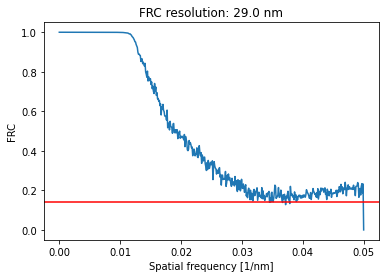

In [ ]:
import pandas as pd

# For a subpixel cross-correlation process we have to provide some parameters.
# As the cross-correlation is being performed on images and not directly on
# localization data, we have to define the pixel size (in nanometers) of the image
# reconstruction, the time axis (in frames) from which data will be collect to
# generate single images to do a cross-correlation and upsample factor to enable
# subpixel drift estimation.

pixel_recon_dim = 10 # image reconstruction pixel size (nm), will be used for
# two-dimensional histograms, larger value -> faster computation (lower accuracy)

# The NaN-values need to be interpolated out
FRC_values = pd.DataFrame(FRC_values, columns=['FRC'])
FRC_values.interpolate(inplace=True, method='linear')

#The x-axis (spatial frequency) goes from 0 to 1/(2*pixel_recon_dim)
spat_freq = np.linspace(0, 1/(2*pixel_recon_dim), len(FRC_values))

#We find the FRC resolution
FRCresolutionID = np.min(np.where(FRC_values<(1/7))[0])
FRCresolution = 1/spat_freq[FRCresolutionID]

# And we plot the FRC curve
plt.plot(spat_freq, FRC_values)
plt.axhline(1/7, color='r', linestyle='-')
plt.xlabel('Spatial frequency [1/nm]')
plt.ylabel('FRC')
plt.title(f"FRC resolution: {np.round(FRCresolution, 1)} nm");

# Fréchet Inception Distance

## Pytorch library

In [ ]:
!pip install pytorch-fid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Tensorflow library

In [ ]:
!pip install https://github.com/bioinf-jku/TTUR.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 218.2 kB 2.3 MB/s 0:00:00
  ERROR: Cannot unpack file /tmp/pip-unpack-d91rb_s0/TTUR.git (downloaded from /tmp/pip-req-build-27nsd_rt, content-type: text/html; charset=utf-8); cannot detect archive format
ERROR: Cannot determine archive format of /tmp/pip-req-build-27nsd_rt


# Inception score and Frechet Inception Distance

## torch-fidelity

In [ ]:
!pip install torch-fidelity

In [ ]:


wrapped_generator = torch_fidelity.GenerativeModelModuleWrapper(generator, 128, 'normal', 0)

metrics_dict = torch_fidelity.calculate_metrics(
    input1=wrapped_generator,
    input2='cifar10-train',
    cuda=True,
    isc=True,
    fid=True,
    kid=True,
    verbose=False,
)

## Pytorch ignite

In [ ]:
!pip install pytorch-ignite

import torch
import torchvision
import ignite
from ignite.metrics import FID, InceptionScore

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.1/264.1 KB 6.9 MB/s eta 0:00:00


In [ ]:
#generate some images
imgs = torch.cat((predicted_image_piq_float32, predicted_image_piq_float32, predicted_image_piq_float32), 1)
imgs = torch.randint(0, 255, (100, 3, 299, 299), dtype=torch.uint8)

inception_score = InceptionScore()
inception_score.update(imgs)
inception_result = inception_score.compute()
print('Inception score: {}'.format(inception_result))

Inception score: 1.0392795869453522


In [ ]:
import torch
import torchvision
import tqdm
from ignite.metrics.gan import FID

!pip install pytorch_fid

from pytorch_fid.inception import InceptionV3

device = "cpu"
dims = 2048
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[dims]
model = InceptionV3([block_idx]).to(device)

import torch.nn as nn

class WrapperInceptionV3(nn.Module):
    def __init__(self, fid_incv3):
        super().__init__()
        self.fid_incv3 = fid_incv3

    @torch.no_grad()
    def forward(self, x):
        y = self.fid_incv3(x)
        y = y[0]
        y = y[:, :, 0, 0]
        return y

wrapper_model = WrapperInceptionV3(model)
wrapper_model.eval();

m = FID(num_features=dims, feature_extractor=wrapper_model)

torch.manual_seed(0)
y_pred = torch.cat((predicted_image_piq_float32, predicted_image_piq_float32, predicted_image_piq_float32), 1)
y = torch.cat((real_image_piq_float32, real_image_piq_float32, real_image_piq_float32), 1)

y_pred, y = torch.rand(100, 3, 299, 299), torch.rand(100, 3, 299, 299)
for i in tqdm.tqdm(range(len(y_pred))):
    m.update((y_pred[i:i+1], y[i:i+1]))

print('Ignite online FID', m.compute())  # 6.109078042628951

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


100%|██████████| 100/100 [01:24<00:00,  1.18it/s]


Ignite online FID 6.109076643300487


# Use all the metrics

In [ ]:
#Library instalation
import time
#Prepare data

init_time = time.time()
#Pixel-based matrics
print('SSIM: {}'.format(metrics.structural_similarity(predicted_image, real_image)))
print((time.time() - init_time)*100)
init_time = time.time()
print('PSNR: {}'.format(metrics.peak_signal_noise_ratio(predicted_image, real_image)))
print((time.time() - init_time)*100)
init_time = time.time()
print('MSE: {}'.format(metrics.mean_squared_error(predicted_image, real_image)))
print((time.time() - init_time)*100)
init_time = time.time()

#Perceptual-based full-reference metrics
print('LPIPS-Alex: {}'.format(loss_fn_alex(img0.float(), img1.float()).item()))
print((time.time() - init_time)*100)
init_time = time.time()
print('LPIPS-VGG: {:.9f}'.format(loss_fn_vgg(img0.float(), img1.float()).item()))
print((time.time() - init_time)*100)
init_time = time.time()

print('FSIM: {}'.format(piq.fsim(predicted_image_piq, real_image_piq, chromatic=False).item()))
print((time.time() - init_time)*100)
init_time = time.time()
print('GMSD: {}'.format(piq.gmsd(predicted_image_piq,real_image_piq).item()))
print((time.time() - init_time)*100)
init_time = time.time()
print('VSI: {}'.format(piq.vsi(predicted_image_piq, real_image_piq).item()))
print((time.time() - init_time)*100)
init_time = time.time()
print('HAARPSI: {}'.format(piq.haarpsi(predicted_image_piq, real_image_piq).item()))
print((time.time() - init_time)*100)
init_time = time.time()
print('MDSI: {}'.format(piq.mdsi(predicted_image_piq, real_image_piq).item()))
print((time.time() - init_time)*100)
init_time = time.time()
print('PIEAPP: {}'.format(pieapp_loss(predicted_image_piq.float(), real_image_piq.float()).item()))
print((time.time() - init_time)*100)
init_time = time.time()
print('DISTS: {}'.format(dists_loss(predicted_image_piq, real_image_piq).item()))
print((time.time() - init_time)*100)
init_time = time.time()

#Perceptual-based no-reference metrics
print('IL-NIQE: {}'.format(calculate_ilniqe(predicted_image, 0, input_order='HWC', resize=True, version='python')))
print((time.time() - init_time)*100)
init_time = time.time()
print('BRISQE: {}'.format(piq.brisque(predicted_image_piq).item()))
print((time.time() - init_time)*100)


SSIM: 0.8140946920838752
15.498161315917969
PSNR: 20.862086993332593
0.6396770477294922
MSE: 533.1773128509521
0.36683082580566406
LPIPS-Alex: 0.26809751987457275
128.80918979644775
LPIPS-VGG: 0.294541925
2242.5264596939087
FSIM: 0.989270360615116
32.997989654541016
GMSD: 0.0749400887942779
3.774857521057129
VSI: 0.9958864725925185
24.567079544067383
HAARPSI: 0.7236608942033307
15.97907543182373
MDSI: 0.18808944032980798
10.45680046081543
PIEAPP: 1.6001052856445312
4761.49423122406
DISTS: 0.08402571047661744
357.90345668792725
IL-NIQE: 26.656779644204565
5311.9770765304565
BRISQE: 41.49095958664532
57.979559898376465
